<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [35]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-04 16:19:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.2’

survey-data.csv.2   100%[===================>] 152.13M  58.9MB/s    in 2.6s    

2025-07-04 16:19:39 (58.9 MB/s) - ‘survey-data.csv.2’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [36]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [37]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()
df_2 = df.copy()

**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [38]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [39]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [40]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [41]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [42]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [43]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [44]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sql     1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [46]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [48]:
df_2.columns.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [50]:
df_2['CompTotal'] = df_2['CompTotal'].fillna(df_2['CompTotal'].mode()[0])

In [53]:
uniques_CompTotal = df_2['CompTotal'].unique().tolist()

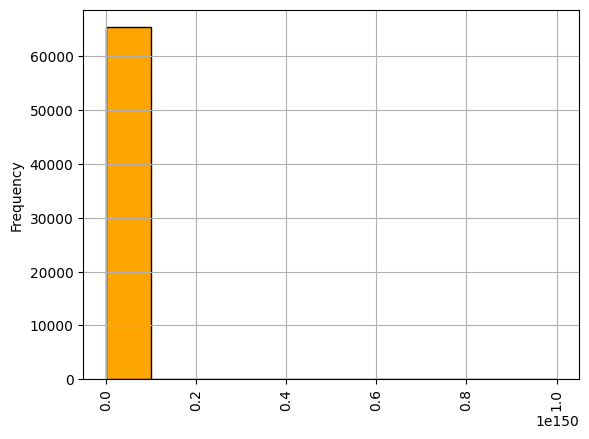

In [54]:
df_2['CompTotal'].plot.hist(color='orange', 
             edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.grid()
plt.show()

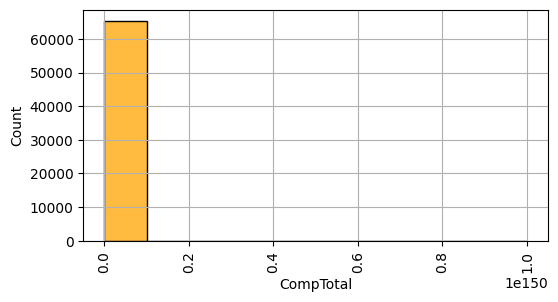

In [56]:
## Write your code here

fig = plt.figure(figsize=(6,3))
sns.histplot(data=df_2 , x='CompTotal', color='orange', 
             edgecolor='black', linewidth=1, bins=10)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [63]:
comp_vc = df_2.loc[:, 'CompTotal'].value_counts().sort_values(ascending=False)

**Box Plots**

Plot a box plot of Age.


In [68]:
topten_comp = comp_vc.iloc[:10]

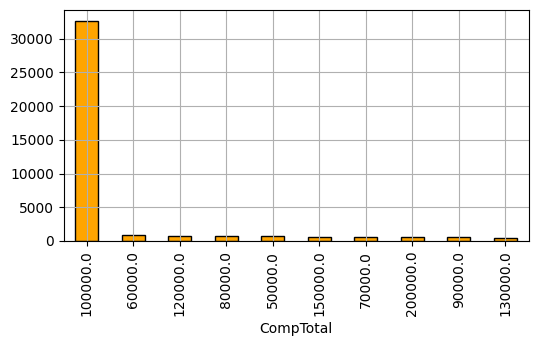

In [91]:
fig = plt.figure(figsize=(6,3))
topten_comp.plot.bar(color='orange', 
             edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
## Write your code here

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


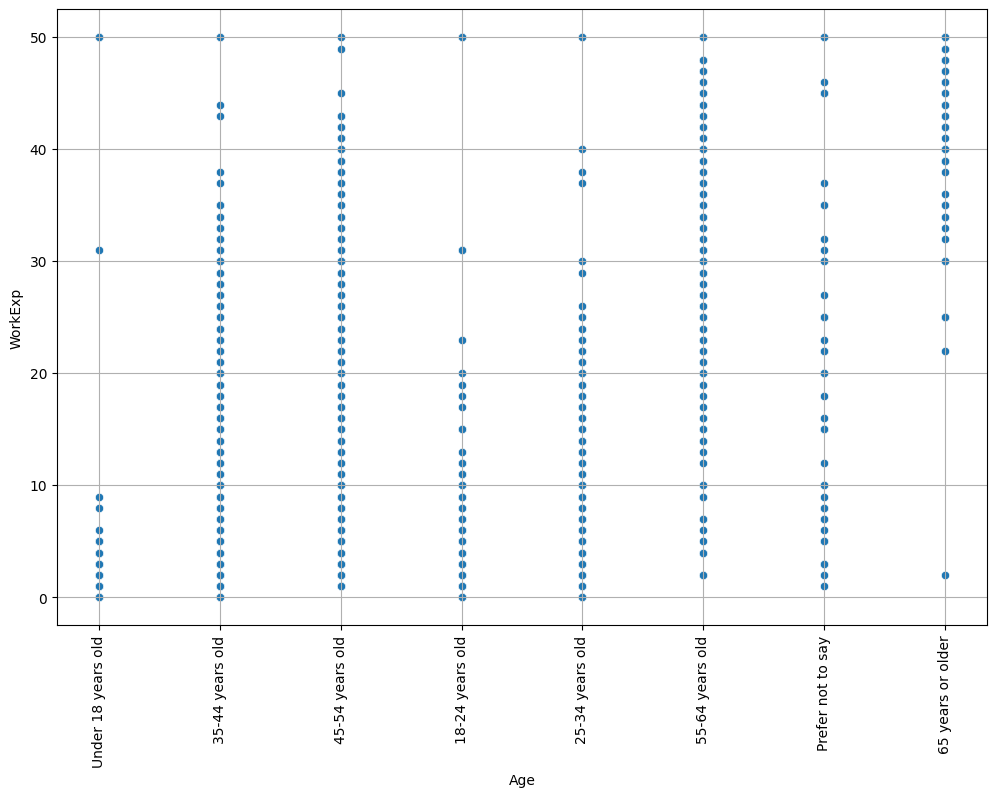

In [76]:
## Write your code here
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_2,
    x='Age',
    y='WorkExp'         
)
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


In [80]:
df_2['TimeSearching'].unique().tolist()

[nan,
 '30-60 minutes a day',
 '60-120 minutes a day',
 '15-30 minutes a day',
 'Less than 15 minutes a day',
 'Over 120 minutes a day']

In [82]:
# df_2['Frustration'].unique().tolist()

In [102]:
frusta_vc = df_2['Frustration'].value_counts().sort_values(ascending=False)

topten_frusta = frusta_vc[:11]

frusta_vc_index = topten_frusta.index.tolist()

frusta_topten_df = df_2[df_2['Frustration'].isin(frusta_vc_index)]

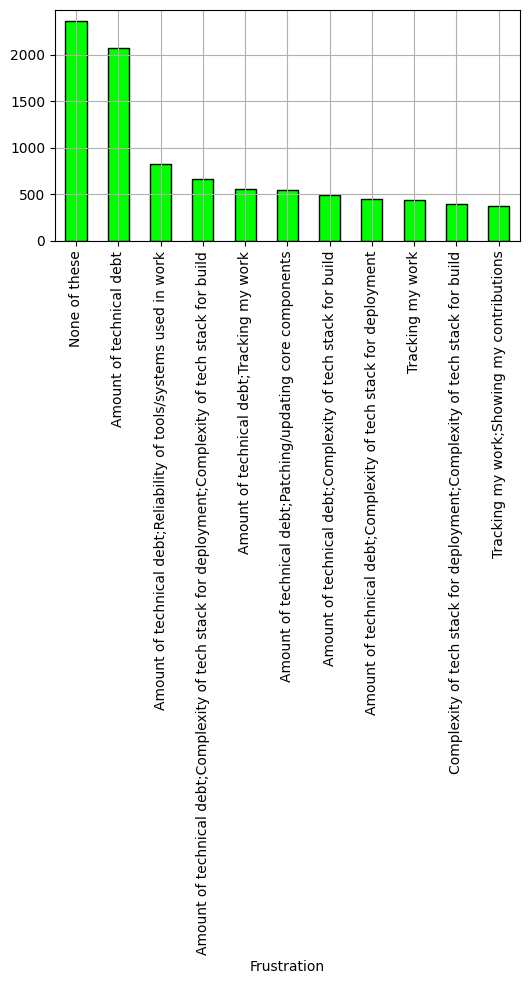

In [103]:
fig = plt.figure(figsize=(6,3))
topten_frusta.plot.bar(color='lime', 
             edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.grid()
plt.show()

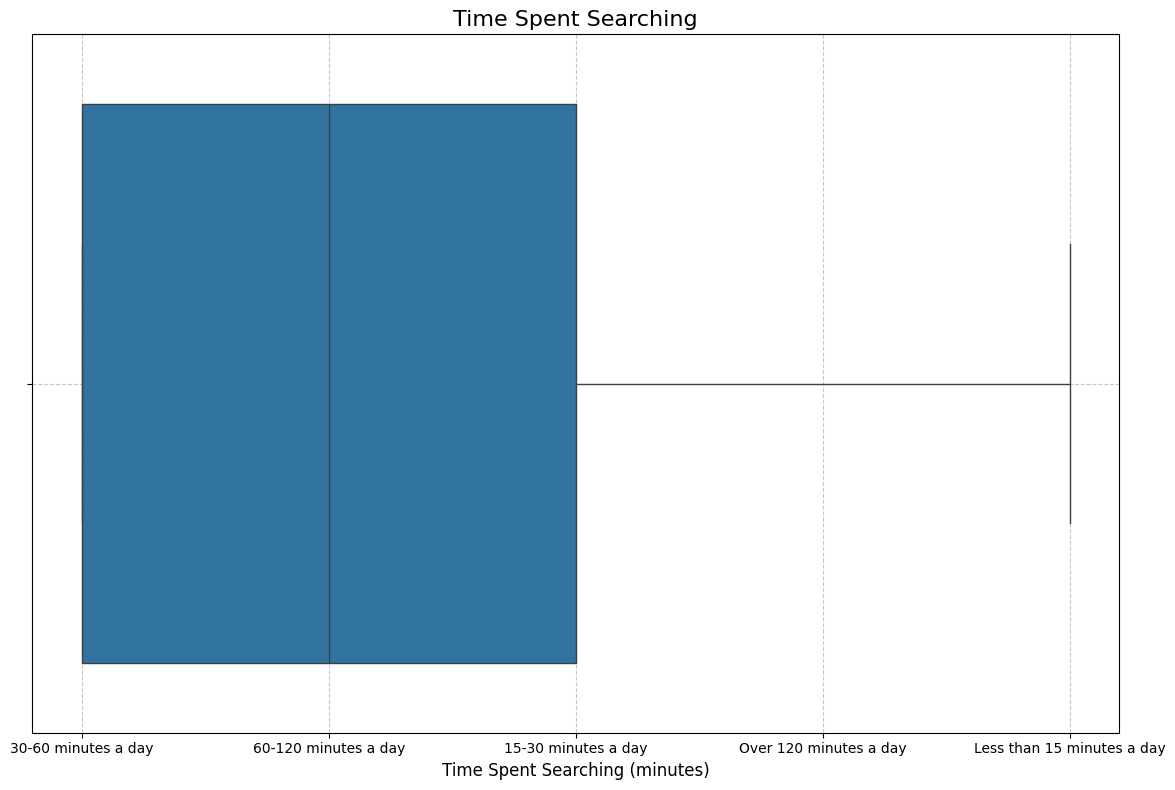

In [104]:
## Write your code here
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=frusta_topten_df,
    x='TimeSearching')

plt.title('Time Spent Searching', fontsize=16)
plt.xlabel('Time Spent Searching (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [105]:
frusta_topten_df['Frustration'].value_counts()

Frustration
None of these                                                                                          2364
Amount of technical debt                                                                               2067
Amount of technical debt;Reliability of tools/systems used in work                                      831
Amount of technical debt;Complexity of tech stack for deployment;Complexity of tech stack for build     666
Amount of technical debt;Tracking my work                                                               556
Amount of technical debt;Patching/updating core components                                              549
Amount of technical debt;Complexity of tech stack for build                                             495
Amount of technical debt;Complexity of tech stack for deployment                                        454
Tracking my work                                                                                        436
Complexity of te

/tmp/ipykernel_937/1921027207.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping


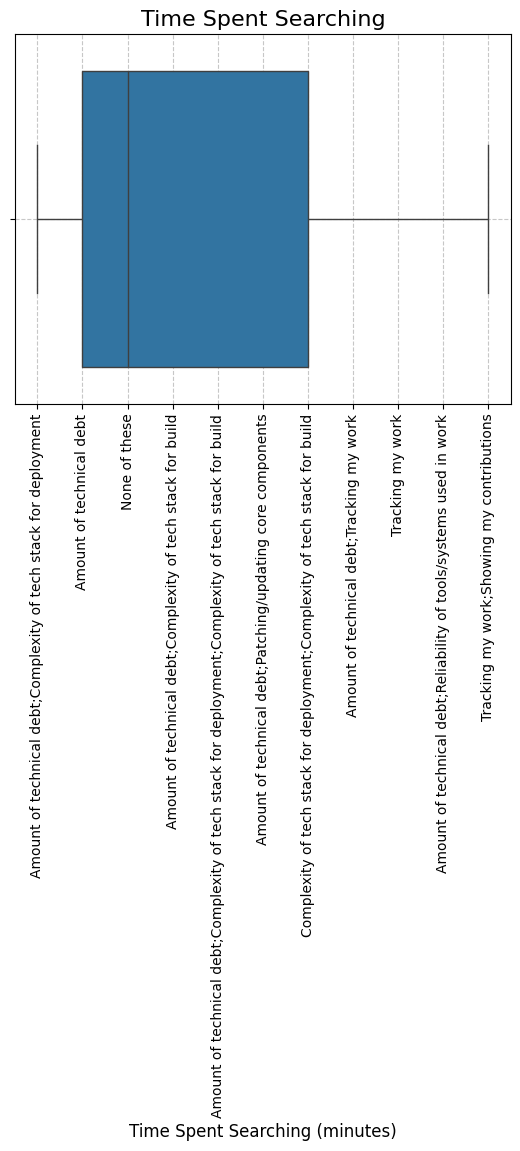

In [107]:
## Write your code here
# plt.figure(figsize=(12, 8))

sns.boxplot(
    data=frusta_topten_df,
    x='Frustration')
plt.xticks(rotation=90)
plt.title('Time Spent Searching', fontsize=16)
plt.xlabel('Time Spent Searching (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


In [110]:
## Write your code here
top5_db = df_2['DatabaseWantToWorkWith'].value_counts()[:5]
top5_db

DatabaseWantToWorkWith
PostgreSQL              3738
PostgreSQL;SQLite       1533
SQLite                  1476
Microsoft SQL Server    1431
MySQL                   1139
Name: count, dtype: int64

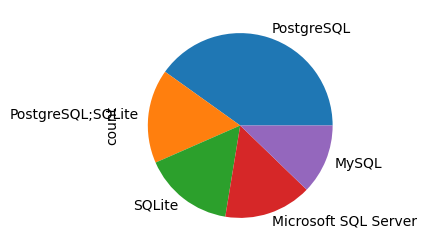

In [113]:
fig = plt.figure(figsize=(6,3))
top5_db.plot.pie()
plt.xticks(rotation=90)
plt.grid()
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [115]:
## Write your code here
df_2['Age'].unique().tolist()
# '25-34 years old'

['Under 18 years old',
 '35-44 years old',
 '45-54 years old',
 '18-24 years old',
 '25-34 years old',
 '55-64 years old',
 'Prefer not to say',
 '65 years or older']

In [119]:
age_filter_df = df_2[df_2['Age']=='25-34 years old']
age_filter_df.head() 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
14,15,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Coding sessions (live or record...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
18,19,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,60.0,10.0,10.0,0.0,0.0,0.0,Appropriate in length,Easy,NaN,10.0
20,21,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Written Tutorials;Stack Overflow;Interactive t...,...,100.0,90.0,90.0,100.0,90.0,100.0,Appropriate in length,Easy,NaN,6.0
27,28,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;On the job training,NaN,...,50.0,20.0,15.0,15.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,NaN,7.0
28,29,I am a developer by profession,25-34 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Other (please specify):;Bootstrapping a ...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


In [123]:
df_2['TimeSearching'] = \
df_2['TimeSearching'].fillna(df_2['TimeSearching'].mode()[0])

df_2['TimeAnswering' ] = \
df_2['TimeAnswering' ].fillna(df_2['TimeAnswering' ].mode()[0])

df_2[['TimeSearching', 'TimeAnswering' ]]

,TimeSearching,TimeAnswering
0,30-60 minutes a day,15-30 minutes a day
1,30-60 minutes a day,15-30 minutes a day
2,30-60 minutes a day,15-30 minutes a day
3,30-60 minutes a day,15-30 minutes a day
4,30-60 minutes a day,15-30 minutes a day
...,...,...
65432,30-60 minutes a day,15-30 minutes a day
65433,30-60 minutes a day,15-30 minutes a day
65434,30-60 minutes a day,15-30 minutes a day
65435,30-60 minutes a day,15-30 minutes a day


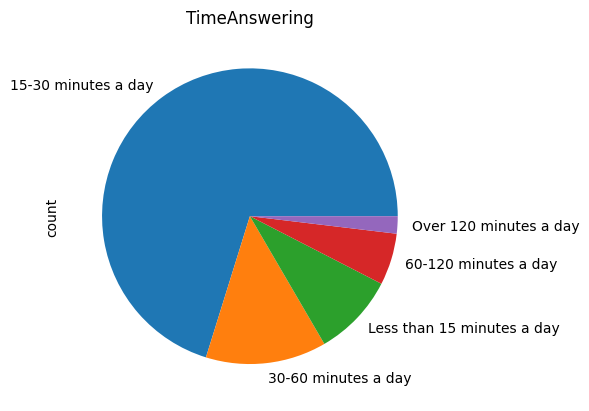

In [130]:

df_2['TimeAnswering' ].value_counts().sort_values(ascending=False).plot.pie()
plt.title('TimeAnswering' )
plt.show()

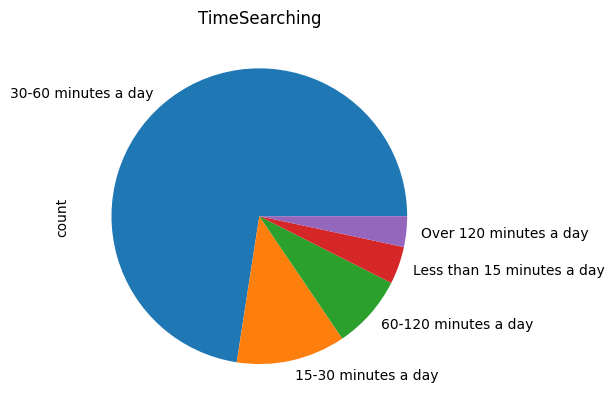

In [129]:

df_2['TimeSearching'].value_counts().sort_values(ascending=False).plot.pie()
plt.title('TimeSearching')
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [133]:
## Write your code here
age_filter_df_55 = df_2[df_2['Age']=='55-64 years old']
age_filter_df_55.head(1) 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
23,24,I am a developer by profession,55-64 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Contribute to open-source projects;Other (plea...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;S...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN


In [134]:
age_filter_df_55['ConvertedCompYearly'].median()

np.float64(109691.0)

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [138]:
## Write your code here
main_branch = \
df_2['MainBranch'].value_counts().sort_values(ascending=False)

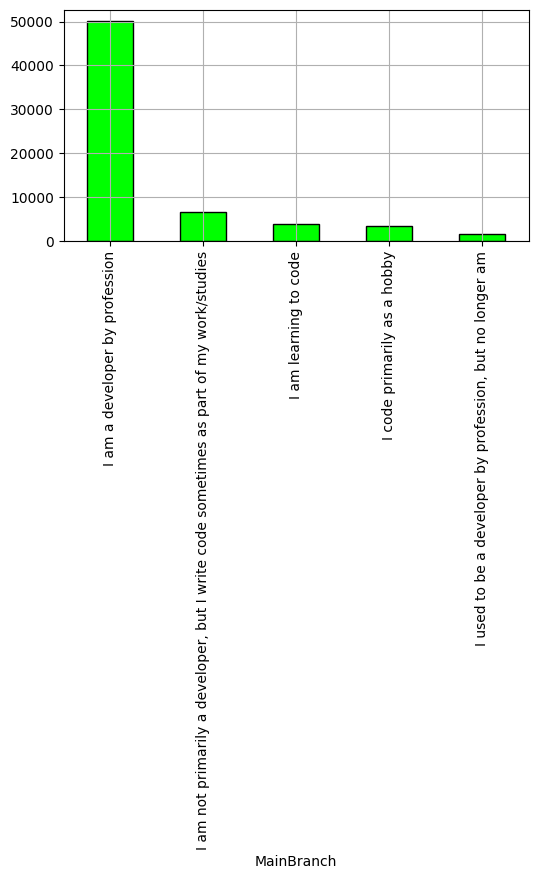

In [139]:
fig = plt.figure(figsize=(6,3))
main_branch.plot.bar(color='lime', 
             edgecolor='black', linewidth=1)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
